# Handling With Highly Skewed Data Set

# Normal Distributed Data Set

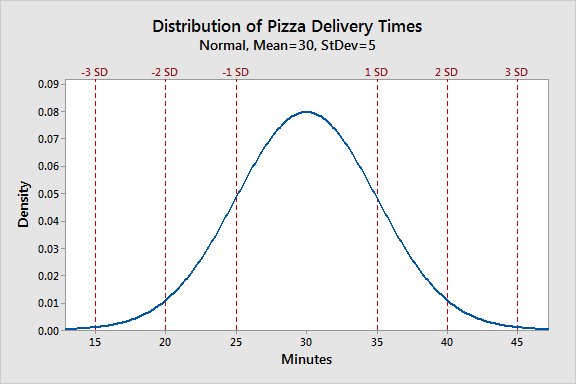


# Positve & Negative Skewed


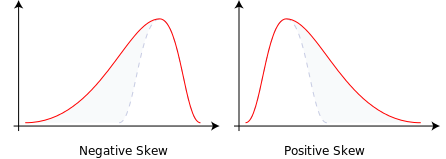

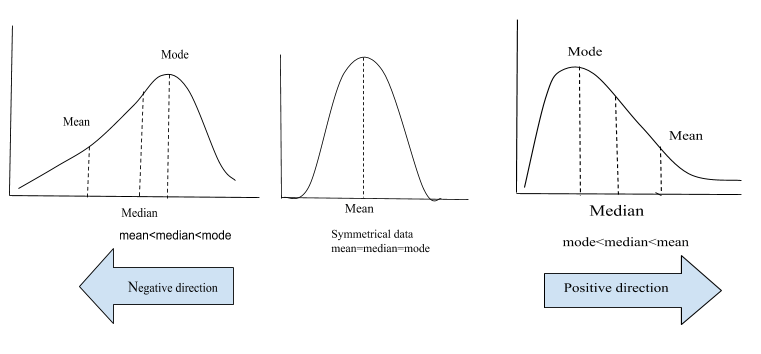

# Get more clearity

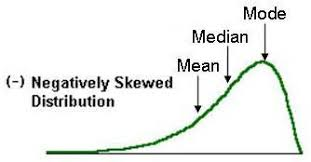

# Let's make it more simply

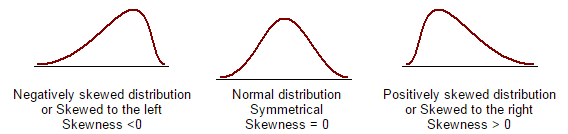

### Skewness
Skewness of a distribution is defined as the lack of symmetry. In a symmetrical distribution, the Mean, Meadian and Mode are equal to each other.The normal distribution has a skewness of 0.
Skewness tell us about where most of the values are concentrated on an ascending scale.


__Now, the question is when we can say our data is mderately skewed or heavily skewed?__
  
  The thumb rule is:
  * If the skewness is between -0.5 to +0.5 then we can say data is fairly symmetrical.
  * If the skewness is between -1 to -0.5 or 0.5 to 1 then data is moderately skewed.
  * And if the skewness is less than -1 and greater than +1 then our data is heavily skewed.

### Types of Skewness

* __Positive skewness:__ In simple words, if the skewness is greater than 0 then the distribution is positively skewed. The tail on the right side of the distribution will be longer or flatter. If the data is positively skewed than most of values will be concentrated below the average value of the data.


* __Negative skewness:__ If the skewness is less than 0 then the distribution is negatively skewed. For negatively skewed data, most of the values will be concentrated above the average value and tail on the left side of the distribution will be longer of flatter.

### What does skewness tells us?

Skewness of a data indicates the **direction and relative magnitude of a distribution's deviation from the normal distribution.** Skewness considers the extremes of the dataset rather than concentrating only on the average. Investors need to look at the extremes while judging the return from market as they are less likely to depend on the average value to work out.

Many **model assumes normal distribution** but in reality data points may not be perfectly symmetric. If the data are skewed, then this kind of **model will always underestimate the skewness risk**.The more the data is skewed the less accurate the model will be.

Here,
* skew of raw data is positive and greater than 1, right tail of the data is skewed.
* skew of raw data is negative and less than 1, left tail of the data is skewed.

In [ ]:
#importing the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### About Dataset

This dataset tells the details about the cars. The car Dataset contain the following attributes:

* index: Unnamed: 0(index values)
* price: The sale price of the vehicle in the ad
* brand: The brand of car
* model: model of the vehicle
* year: The vehicle registration year
* title_status: This feature included binary classification, which are clean title vehicles and salvage insurance
* mileage: miles traveled by vehicle
* color: Color of the vehicle
* vinThe:  vehicle identification number is a collection of 17 characters (digits and capital letters)
* lot: A lot number is an identification number assigned to a particular quantity or lot of material from a single manufacturer. For cars, a lot number is combined with a serial number to form the Vehicle Identification Number.
* state: The location in which the car is being available for purchase
* country: The location in which the car is being available for purchase
* condition: Time

In [ ]:
#reading the dataset
data = pd.read_csv('/kaggle/input/usa-cers-dataset/USA_cars_datasets.csv')

In [ ]:
#look at dataset
data.head(2)

In [ ]:
#Removing the unnamed: 0 column 
data = data.drop(['Unnamed: 0'], axis = 1)

In [ ]:
data.head(2)

In [ ]:
#Exploring the dataset information
data.info()

In [ ]:
#checking dimension of dataset
data.shape

In [ ]:
#importing library for visualising dataset and plotting the  histogram for  price attributes
import seaborn as sns
data['price'].hist(grid = False)

In [ ]:
# Checking the skewness of Price column of dataset
data['price'].skew()

In [ ]:
#density plot
sns.distplot(data['price'], hist = True)

__Note:__ As we can see the skewed values lies between the 0.5 to 1 range. so, data is moderately skewed and right skewed(but it's fine to train the model with it). Let's explore another attribute.

In [ ]:
# Checking the skewness of mileage column of dataset
data['mileage'].skew() 

In [ ]:
sns.distplot(data['mileage'], hist = True)

__Note:__ As we can see the skewed values lies between -1 and greater than +1 then our data is heavily skewed. so, data is heavily skewed. data['mileage'] is right skewed by looking at the graph and skewed values.

## How to handle these skewed data?

### Transformation
In data analysis transformation is the replacement of a variable by a function of that variable: for example, replacing a variable x by the square root of x or the logarithm of x. In a stronger sense, a transformation is a replacement that changes the shape of a distribution or relationship.

## Steps to do transformation

__1.__  Draw a graph(histogram and density plot) of the data to see how far patterns in data match the simplest ideal patterns.

    
__2.__ check the range the data. because Transformations will have little effect if the range is small.

__3.__ check the skewness by statistical methods(decide right and left skweness).

__4.__ apply the methods (explained in detail below) to handle the skewness based on the skewed values.

### Reasons for using transformations

There are many reasons for transformation. 

        1. Convenience
        2. Reducing skewness
        3. Equal spreads
        4. Linear relationships
        5. Additive relationships

__1. Convenience:__ A transformed scale may be as natural as the original scale and more convenient for a specific purpose.
    for example- percentage rather than the original data.
    
__2. Reducing skewness:__ A transformation may be used to reduce skewness.  A distribution that is symmetric or nearly so is often easier to handle and interpret than a skewed distribution. 
    
        - To handle the right skewness, we use:
                - logarithms (best for it)
                - roots[square root and cube root] (good)
                - reciprocals (weak)
    
        - To handle left skewness, we use:
                - squares 
                - cubes
                - higher powers.
 
__3. Equal spreads:__ A transformation may be used to produce approximately equal spreads, despite marked variations in level, which again makes data easier to __handle and interpret__. Each data set or subset having about the same spread or variability is a condition called __homoscedasticity__ and it's opposite is called __heteroscedasticity__


__4. Linear relationships:__ When looking at relationships between variables,it is often far easier to think about patterns that are approximately linear than about patterns that are highly curved. This is vitally important when using linear regression, which amounts to fitting such patterns to data.

__5. Additive relationships__ Relationships are often easier to analyse when additive rather than (say) multiplicative. So

        y = a + bx

In which two terms __a__ and __bx__ are added is easier to deal with, than


        y = ax^b

In which two terms __a__ and __x^b__ are multiplied. Additivity is a vital issue in analysis of variance (in Stata, anova, oneway, etc.).



### To Handle Right Skeweness

###  1. log Transformation

The log transformation is widely used in research to deal with skewed data. It is the best method to handle the right skewed data.

### Why log? 

* The normal distribution is widely used in basic research studies to model continuous outcomes. Unfortunately, the symmetric bell-shaped distribution often does not adequately describe the observed data from research projects. Quite often data arising in real studies are so skewed that standard statistical analyses of these data yield invalid results. 

* Many methods have been developed to test the normality assumption of observed data. When the distribution of the continuous data is non-normal, transformations of data are applied to make the data as __"normal"__ as possible and, thus, __increase the validity of the associated statistical analyses.__

* Popular use of the log transformation is to __reduce the variability of data__, especially in data sets that include outlying observations. Again, contrary to this popular belief, log transformation can often __increase – not reduce – the variability of data whether or not there are outliers.__

### Why not?

* Using transformations in general and log transformation in particular can be quite problematic. If such an approach is used, the researcher must be mindful about its limitations, particularly when interpreting the relevance of the analysis of transformed data for the hypothesis of interest about the original data.

* As from the below graph we can see that at zero it get deviated & hence log transformation doesn't work for negative zero values.

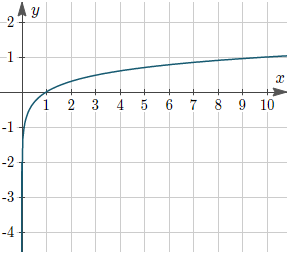

In [ ]:
#performing the log transformation using numpy
log_mileage = np.log(data['mileage'])
log_mileage

In [ ]:
#checking the skewness after the log-transformation
log_mileage.skew()

It's giving us __nan__ because there are some values as the zero. In log transformation, it deals with only the positive and negative numbers not with zero. The log is range in between (- infinity to infinity) but greater or less than zero. For better understanding you can check the log graph below:



__Note:__ In the graph, the line at zero is deviated towards the positive infinity. so, If you are getting zeros inside the data, refer root Transformation.

### 2. Root Transformation

#### 2.1 Square root Transfomation

* The square root means __x__ to __x^(1/2)__ = __sqrt(x)__, is a transformation with a moderate effect on distribution shape. it is __weaker than the logarithm and the cube root__. 

* It is also used for reducing right skewness, and also has the advantage that it can be __applied to zero values__. 

* Note that the square root of an area has the units of a length. It is commonly applied to counted data, especially if the values are mostly rather small.

In [ ]:
#calculating the square root for data['mileage'] column
sqrt_mileage = np.sqrt(data['mileage'])
sqrt_mileage

In [ ]:
#calculation skewness after calculating the square root 
sqrt_mileage.skew()

In [ ]:
#visualising by density plot
sns.distplot(sqrt_mileage, hist = True)

__Note:__ In previous case we got the __nan__ because of zero, but the square root tranformation has reduced the skewed values __from 7.07 to 1.66.__ which is very much nearer to zero compare to 7.07.

#### 2.2 cube root Transformation

* The cube root means __x to x^(1/3)__. This is a fairly strong transformation with a substantial effect on distribution shape, 

* It is __weaker than the logarithm but stronger than the square root__ transformation.

* It is also used for reducing right skewness, and has the advantage that it can be __applied to zero and negative values__.  Note that the cube root of a volume has the units of a length. It is commonly applied to rainfall data.

In [ ]:
#calculating the cube root for the column data['mileage'] column

cube_root_mileage = np.cbrt(data['mileage'])
cube_root_mileage

In [ ]:
#calculation skewness after calculating the cube root 
cube_root_mileage.skew()

In [ ]:
#visualising by density plot
sns.distplot(cube_root_mileage, hist = True)

__Note:__ In logrithm transformation we got the __nan__ because of zero, and in the square root tranformation it has reduced the skewed values from __7.07 to 1.66.__ but now in cube root transformation the skewed values __reduced to 0.68.__ and it is very much near to zero compare to 1.66 and 7.07.

### 3. reciprocals Transformation

* The reciprocal, x to 1/x, with its sibling the negative reciprocal, __x to -1/x__, is a very strong transformation with a drastic effect on distribution shape. 

* It can not be applied to zero values. Although it can be applied to __negative values__, it is not useful unless all values are positive.

For Example: we might want to multiply or divide the results of taking the reciprocal by some constant, such as 100 or 1000, to get numbers that are easy to manage, but that itself has no effect on skewness or linearity.

In [ ]:
#calculating the reciprocal for the column data['mileage'] column
recipr_mileage = np.reciprocal(data['mileage'])
recipr_mileage

In [ ]:
recipr_mileage.skew()

__Note:__ It's giving output as  __nan__ because there are some values as the zero. In reciprocal transformation, __it's good deal with negative numbers not with zero.__

# We can analyze different technique to tackle with highly positive skewed data points & soon we will see with negatively skewed data point in next notebook.

# If you found it useful do upvote!!